In [1]:
import pandas as pd

In [2]:
import pickle

with open('tables/paper_summary_table.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
import numpy as np
# Function to compute the area using the Shoelace formula
def compute_area(values, angles):
    x = [r * np.cos(a) for r, a in zip(values, angles)]
    y = [r * np.sin(a) for r, a in zip(values, angles)]
    return 0.5 * abs(sum(x[i] * y[i + 1] - y[i] * x[i + 1] for i in range(len(values) - 1)))


Area for A: 13374.23
Area for B: 7875.94
Area for C: 6984.32
Area for D: 7875.94


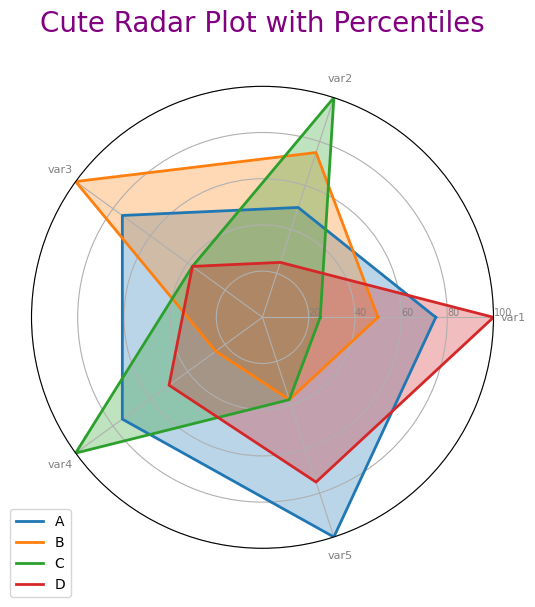

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Sample DataFrame
df1 = pd.DataFrame({
    'var1': [4, 3, 2, 5],
    'var2': [2, 3, 4, 1],
    'var3': [3, 4, 2, 2],
    'var4': [4, 2, 5, 3],
    'var5': [5, 3, 3, 4]
}, index=['A', 'B', 'C', 'D'])

# Normalize the DataFrame to percentiles
df_percentiles = df1.rank(pct=True) * 100

# Function to create radar plot
def create_radar_chart(df, title, alpha=0.3):
    categories = list(df)
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=7)
    plt.ylim(0, 100)
    
    # Plot each group
    for i in range(len(df)):
        values = df.iloc[i].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=df.index[i])
        ax.fill(angles, values, alpha=alpha)
        area = compute_area(values, angles)
        print(f"Area for {df.index[i]}: {area:.2f}")
    
    # Add a title
    plt.title(title, size=20, color='purple', y=1.1)
    
    # Add a legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    # Show the plot
    plt.show()

# Create radar chart
create_radar_chart(df_percentiles, 'Cute Radar Plot with Percentiles')

In [5]:
df

,Novelty (%),Structural,Compositional,Recall,Precision,$\rho$,$E$,# Elements,P1 (%),Space Group,Elements,S.U.N. (%)
Method,,,,,,,,,,,,
WyckoffTransformer-CrySPR,90.0,99.555556,80.444444,98.666667,96.715328,0.744049,0.053159,0.09607,3.333333,0.22206,0.039926,39.239239
WyckoffTransformer-DiffCSP++,89.5,99.664804,80.335196,99.217877,96.792745,0.672095,0.050328,0.098926,1.452514,0.211308,0.039057,36.7
DiffCSP,90.060241,100.0,80.936455,99.554069,96.206591,0.822378,0.052409,0.293636,36.566332,7.988511,0.099216,57.4
DiffCSP++,89.68969,100.0,85.044643,99.330357,95.79739,0.147837,0.036122,0.503632,2.566964,0.25525,0.047999,41.4
CrystalFormer,76.923077,86.842105,82.368421,99.868421,95.13382,0.641448,0.099555,0.201472,1.842105,0.276231,0.089177,37.600806
FlowMM,89.439632,100.0,81.927415,99.668955,99.635036,0.489733,0.035512,0.130643,44.274154,12.423176,0.014638,NaN
MP-20 train/test,100.0,100.0,90.421258,99.764125,99.955762,0.049378,0.015128,0.011017,1.732208,0.025811,0.006377,98.7


In [6]:
df.fillna(0, inplace=True)
df.columns

Index(['Novelty (%)', 'Structural', 'Compositional', 'Recall', 'Precision',
       '$\rho$', '$E$', '# Elements', 'P1 (%)', 'Space Group', 'Elements',
       'S.U.N. (%)'],
      dtype='object')

In [7]:
df_percentiles = df.rank(pct=True) * 100
percentage_columns = ['Novelty (%)', 'Structural', 'Compositional', 'Recall', 'Precision', 'S.U.N. (%)']
percentage_columns_desc = ['P1 (%)', ]

for c in ['$\\rho$', '$E$', '# Elements', 'Space Group']:
    df_percentiles[c] = df[c].rank(pct=True, ascending=False) * 100

for c in percentage_columns:
    df_percentiles[c] = df[c]
    
for c in percentage_columns_desc:
    df_percentiles[c] = (100 - df[c]) / (100 - df[c].min()) * 100
df_percentiles.drop(columns=['Elements'], inplace=True)
df_percentiles.drop('MP-20 train/test', inplace=True)
# drop row 'MP-20 train/test'



In [8]:
df_percentiles

,Novelty (%),Structural,Compositional,Recall,Precision,$\rho$,$E$,# Elements,P1 (%),Space Group,S.U.N. (%)
Method,,,,,,,,,,,
WyckoffTransformer-CrySPR,90.000000,99.555556,80.444444,98.666667,96.715328,28.571429,28.571429,85.714286,98.091459,71.428571,39.239239
WyckoffTransformer-DiffCSP++,89.500000,99.664804,80.335196,99.217877,96.792745,42.857143,57.142857,71.428571,100.000000,85.714286,36.700000
DiffCSP,90.060241,100.000000,80.936455,99.554069,96.206591,14.285714,42.857143,28.571429,64.368631,28.571429,57.400000
DiffCSP++,89.689690,100.000000,85.044643,99.330357,95.797390,85.714286,71.428571,14.285714,98.869124,57.142857,41.400000
CrystalFormer,76.923077,86.842105,82.368421,99.868421,95.133820,57.142857,14.285714,42.857143,99.604666,42.857143,37.600806
FlowMM,89.439632,100.000000,81.927415,99.668955,99.635036,71.428571,85.714286,57.142857,56.547202,14.285714,0.000000


Area for WyckoffTransformer-CrySPR: 16820.89
Area for WyckoffTransformer-DiffCSP++: 18199.15
Area for DiffCSP: 13092.63
Area for DiffCSP++: 17282.00
Area for CrystalFormer: 13912.38
Area for FlowMM: 15518.86


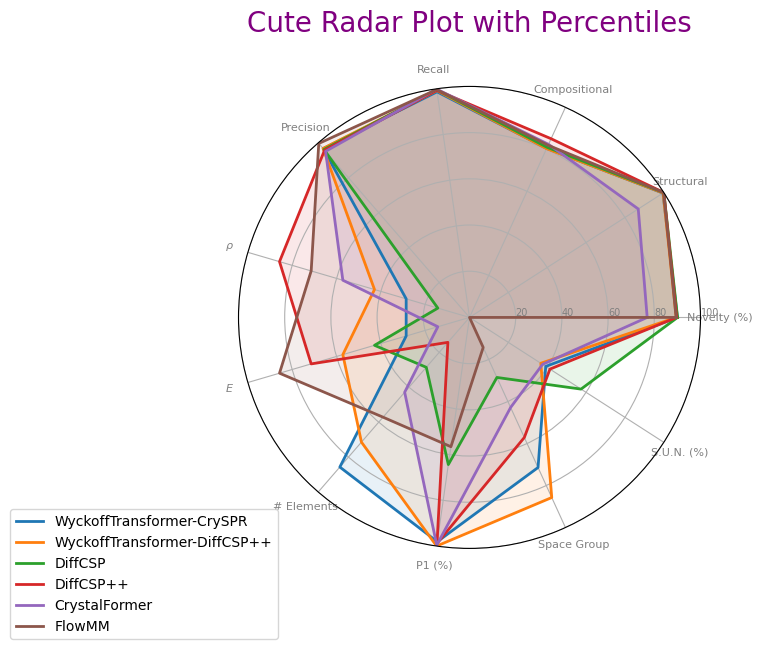

In [9]:
create_radar_chart(df_percentiles, 'Cute Radar Plot with Percentiles', alpha=0.1)

In [10]:
df_percentiles['P1 (%)'], df['P1 (%)']

(Method
 WyckoffTransformer-CrySPR        98.091459
 WyckoffTransformer-DiffCSP++    100.000000
 DiffCSP                          64.368631
 DiffCSP++                        98.869124
 CrystalFormer                    99.604666
 FlowMM                           56.547202
 Name: P1 (%), dtype: float64,
 Method
 WyckoffTransformer-CrySPR        3.333333
 WyckoffTransformer-DiffCSP++     1.452514
 DiffCSP                         36.566332
 DiffCSP++                        2.566964
 CrystalFormer                    1.842105
 FlowMM                          44.274154
 MP-20 train/test                 1.732208
 Name: P1 (%), dtype: float64)